In [6]:
## Install pytrends
!pip install pytrends
#pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

In [12]:
## Import lib - Add pytrends which allows to connect to Google trends db
import pandas as pd
import time
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

# Connection to Google server

In [37]:
## Connect to google
#pytrend = TrendReq()#(backoff_factor=1, retries=2)#backoff_factor=1, retries=5, proxies=['https://34.203.233.13:80',])#, timeout=(9.5,25))
pytrend = TrendReq(backoff_factor=1, retries=3)

## 1.Tesla example

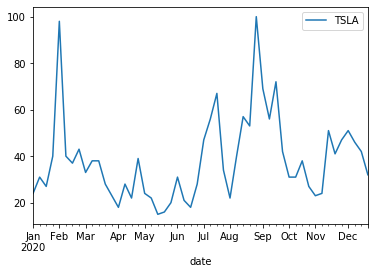

In [40]:
## Google search results
'''
- Expressed to the highest point on the chart for the given region and time. 
- A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular.
- A score of 0 means there was not enough data for this term.
'''
time.sleep(1)
pytrend.build_payload(kw_list=['TSLA'], cat=0, timeframe='2020-01-01 2020-12-31', geo='US')
gtrends_by_keyword = pytrend.interest_over_time()
gtrends_by_keyword.drop(labels=['isPartial'],axis='columns')
gtrends_by_keyword.plot()

In [ ]:
## Google trends results for TSLA for 2020
gtrends_by_keyword

In [ ]:
related_topic = pytrend.related_topics()
related_topic.values()

In [ ]:
related_queries = pytrend.related_queries()
related_queries.values()

## Main - Focus on Russell 3000

In [14]:
colnames = ["Tickers", "BBG Tickers", "Names"]
df = pd.read_csv("RUSSELL3000.csv", names=colnames)[1:]
tickers_list = df["Tickers"].values.tolist()
names_list = df["Names"].values.tolist()
#years_list = list(range(2016, 2021, 1))
start=2016
end=2020
print("- length of tickers' list: ", len(tickers_list), "\n- length of tickers' list: ", len(names_list))

- length of tickers' list:  4252 
- length of tickers' list:  4252


In [15]:
## US Google search results by keyword and year
def gtrends_by_keyword(keyword='TSLA', category=0, year_start=start, year_end=end, loc='US'): 
    '''
    === GENERAL RULES ===
    - Expressed to the highest point on the chart for the given region and time. 
    - A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular.
    - A score of 0 means there was not enough data for this term.
    
    === SPECIFIC RULES ===
    - keyword is the keyword to search,
    - loc is a certain country code, e.g ‘US’, or ‘’ for worldwide
    - cat is the category and is set to 0 to seek into 'All category', for 'Food & Drink' category, set to 71,
    - year is set by default to 2020
    '''
    #time.sleep(1)
    #Enter try to manage proper input type
            
    pytrend.build_payload(kw_list=[keyword], 
                          cat=category, 
                          timeframe= str(year_start) + '-01-01 ' + str(year_end) + '-12-31', 
                          geo=loc)
    gtrends_by_keyword = pytrend.interest_over_time()
    return gtrends_by_keyword

In [15]:
## Weekly US Google serach results by keyword since 2016 for 5 years
'''def gtrends_by_keyword(key='TSLA', category=0, period=years_list, loc='US'):
    
    === SPECIFIC RULES ===
    - keyword is the keyword to search,
    - loc is set to certain country code, e.g ‘US’, or ‘’ for worldwide
    - cat is set to 0 to seek into 'All category', for 'Food & Drink' category, set to 71,
    - period is a an array of years 
    
    result = pd.DataFrame(columns=[key])
    for y in years_list:
        time.sleep(0.2)
        temp_result = gtrends_by_keyword_and_year(keyword=key, category=category, year=y, loc=loc)
        if not temp_result.empty:
            temp_result = temp_result.drop(labels=['isPartial'],axis='columns')
            result = pd.concat([result, temp_result])
    return result
    
'''

"def gtrends_by_keyword(key='TSLA', category=0, period=years_list, loc='US'):\n    \n    === SPECIFIC RULES ===\n    - keyword is the keyword to search,\n    - loc is set to certain country code, e.g ‘US’, or ‘’ for worldwide\n    - cat is set to 0 to seek into 'All category', for 'Food & Drink' category, set to 71,\n    - period is a an array of years \n    \n    result = pd.DataFrame(columns=[key])\n    for y in years_list:\n        time.sleep(0.2)\n        temp_result = gtrends_by_keyword_and_year(keyword=key, category=category, year=y, loc=loc)\n        if not temp_result.empty:\n            temp_result = temp_result.drop(labels=['isPartial'],axis='columns')\n            result = pd.concat([result, temp_result])\n    return result\n    \n"

In [16]:
# Test of the get_gtrends_by_keyword function
result = gtrends_by_keyword()
result

,TSLA,isPartial
date,,
2016-01-03,5,False
2016-01-10,4,False
2016-01-17,4,False
2016-01-24,5,False
2016-01-31,6,False
...,...,...
2020-11-29,46,False
2020-12-06,51,False
2020-12-13,49,False


In [16]:
## US Google search results over time (5 years) for all tickers of Russell3000
def gtrends(keywords_list=[], cat=0, starting_year=start, ending_year=end, geo='US'):
    ''' 
    - keywords_list is a list of keywords to search,
    - loc is set to certain country code, e.g ‘US’, or ‘’ for worldwide
    - cat is set to 0 to seek into 'All category', for 'Food & Drink' category, set to 71,
    - timeframe is set by default to past 5 years 'today 5-y', for 2004 to present, set it to 'all'
    '''
    
    gt = []
    for i in range(len(keywords_list)):
        gtrends_by_key = gtrends_by_keyword(keyword=keywords_list[i],
                                            category=cat,
                                            year_start=starting_year,
                                            year_end=ending_year,
                                            loc=geo)
        if not gtrends_by_key.empty:
            gtrends_by_key = gtrends_by_key.drop(labels=['isPartial'],axis='columns')
            gt.append(gtrends_by_key)
    result = pd.concat(gt, axis=1)
    return result
    #result.to_csv('Russell3000_GoogleSearch_' + serie_name + '.csv')

In [38]:
## Main execution

# Number of tickers to be requested by minute (knowing that: 5y of weekly data by ticker)
# Limit by google is 2000 calls per minute
Nb = 7 

# width of range to scan all Russell 3000 list
modulo=len(tickers_list)//Nb + 1


## Build result

# Start time
startTime = time.time()

result=[]

# last ticker position built
last_built=559
for i in range(last_built,modulo):
    print("Requesting google search for ticker number: ", i)
    if Nb*(i+1)<=len(tickers_list):
        gtrends_temp = gtrends(keywords_list=tickers_list[Nb*i:Nb*(i+1)])
    else:
        gtrends_temp = gtrends(keywords_list=tickers_list[Nb*i:])
    if not gtrends_temp.empty:
        result.append(gtrends_temp)
    print("Ticker ", i, " is built \n")
    time.sleep(5)


    
#print("Sending dataframe to csv...")
#russell_trend = pd.concat(result, axis=1)
#russell_trend.to_csv('Russell3000_GoogleSearch_tickers.csv')

    
# Show time of execution
executionTime = (time.time() - startTime)
print('Execution time in sec.: ' + str(executionTime))

Requesting google search for ticker number:  559
Ticker  559  is built 

Requesting google search for ticker number:  560
Ticker  560  is built 

Requesting google search for ticker number:  561
Ticker  561  is built 

Requesting google search for ticker number:  562
Ticker  562  is built 

Requesting google search for ticker number:  563
Ticker  563  is built 

Requesting google search for ticker number:  564
Ticker  564  is built 

Requesting google search for ticker number:  565
Ticker  565  is built 

Requesting google search for ticker number:  566
Ticker  566  is built 

Requesting google search for ticker number:  567
Ticker  567  is built 

Requesting google search for ticker number:  568
Ticker  568  is built 

Requesting google search for ticker number:  569
Ticker  569  is built 

Requesting google search for ticker number:  570
Ticker  570  is built 

Requesting google search for ticker number:  571
Ticker  571  is built 

Requesting google search for ticker number:  572
Ti

In [39]:
russell_trend = pd.concat(result, axis=1)
russell_trend.to_csv('Russell_part13.csv')